# Introduction

We were given some data sets and asked to predict what values they should take. 

In [5]:
#Import Dependencies
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

"Dependencies Imported"

'Dependencies Imported'

In [6]:
def inputData(fileNumber):
    xlearn = pd.read_csv('./MLClass/data/task1_'+ str(fileNumber)+'_learn_X.csv', header = None, delimiter = ' ')
    ylearn = pd.read_table('./MLClass/data/task1_'+ str(fileNumber)+'_learn_y.csv', header = None, delimiter = ' ')
    ylearn.columns = ['class']
    xtest = pd.read_csv('./MLClass/data/task1_'+ str(fileNumber)+'_test_X.csv', header = None, delimiter = ' ')
    param = xlearn.shape
    return xlearn, ylearn, xtest, param[1]


xlearn, ylearn, xtest, param = inputData(1)
#print(xlearn)
xlearn.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.006554     0.007988     0.007838     0.014805     0.033514   
std       1.018140     1.014091     1.030617     0.979357     0.958296   
min      -3.444142    -3.488324    -3.607121    -3.550403    -2.969129   
25%      -0.678632    -0.687782    -0.689093    -0.616277    -0.636579   
50%       0.012122     0.015294    -0.010647    -0.013952     0.035614   
75%       0.721346     0.724078     0.684333     0.626877     0.696281   
max       3.628989     2.593390     3.668205     3.190194     3.271339   

                5            6            7            8            9   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.037199    -0.001892     0.014925    -0.025322    -0.017130   
std       0.984098     1.011218     1.012626     0.993793     1.048693   
min      -3.020601    -3.275101    -3.451217    -3.305774    -3.094958   
25%      -0.635101    -0.637576    -0.658920    -0.719190    -0.743936   
50%      -0.013958    -0.030523    -0.027809    -0.050507     0.020378   
75%       0.685405     0.670593     0.671086     0.618216     0.715876   
max       3.499498     2.947290     3.349688     2.986783     3.245496   

                10           11           12           13           14  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.019154     0.007633    -0.004837     0.054162    -0.042993   
std       1.018321     0.995432     1.017077     1.000077     0.986082   
min      -3.137944    -2.614191    -3.395717    -3.467974    -3.446683   
25%      -0.621314    -0.708703    -0.631684    -0.653675    -0.691012   
50%      -0.020935     0.026790     0.023567     0.094964    -0.065443   
75%       0.702497     0.679673     0.675206     0.728292     0.619876   
max       3.734826     3.489706     3.238683     3.244880     3.487842   

                15           16           17           18           19  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean     -0.047769    -0.003748     0.040972     0.037273     0.043072  
std       1.008463     1.006256     1.005807     1.017386     1.011351  
min      -3.711415    -2.859279    -3.113581    -3.088777    -3.255893  
25%      -0.681018    -0.691144    -0.671681    -0.647339    -0.655131  
50%      -0.083217    -0.001229     0.066292     0.038222     0.051117  
75%       0.593200     0.655977     0.733361     0.724586     0.753504  
max       2.966280     2.972222     3.255548     3.339377     3.107436

In [7]:
type(xlearn)
learn = pd.concat([xlearn, ylearn], axis = 1)
type(learn)
#learn.describe()
#learn.tail()





pandas.core.frame.DataFrame

In [8]:
def seperateData(set):
    set0 = set[set['class'] == 0]
    set1 = set[set['class'] == 1]
    return set0, set1
learn0, learn1 = seperateData(learn)

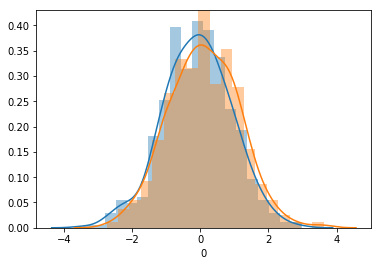

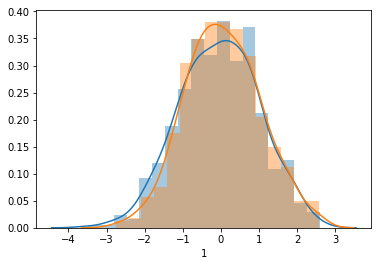

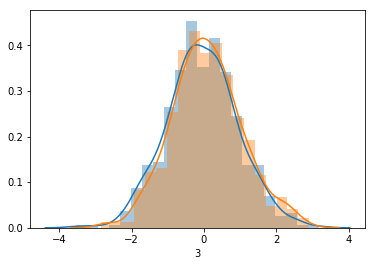

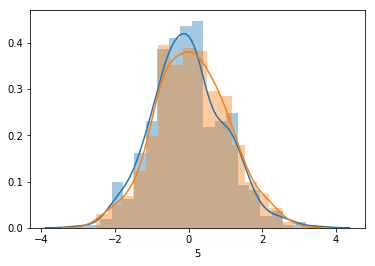

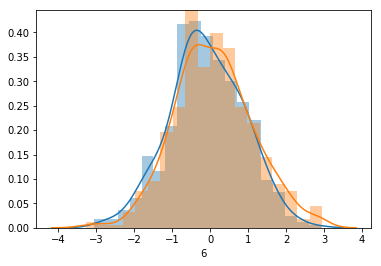

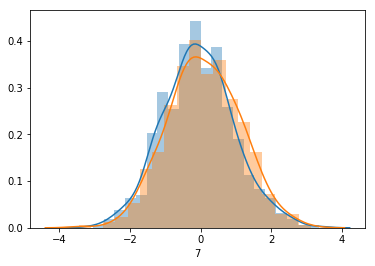

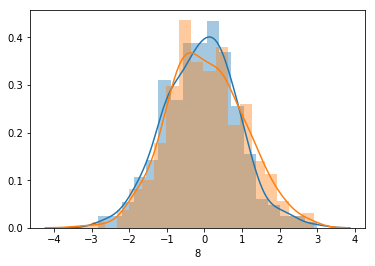

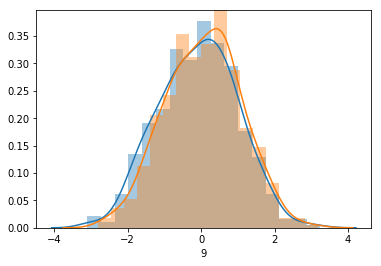

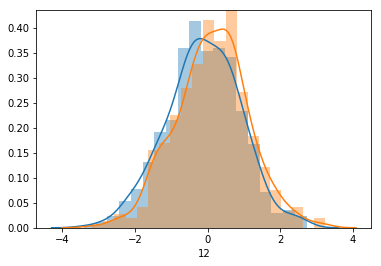

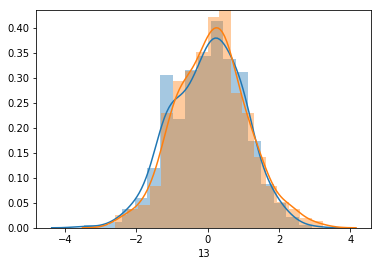

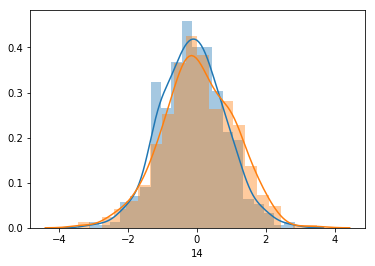

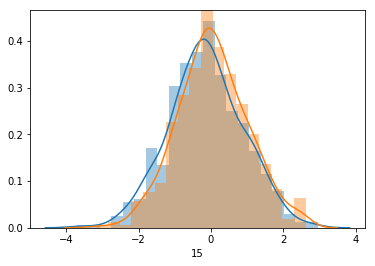

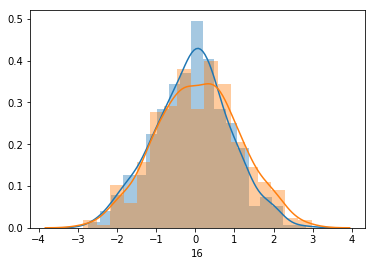

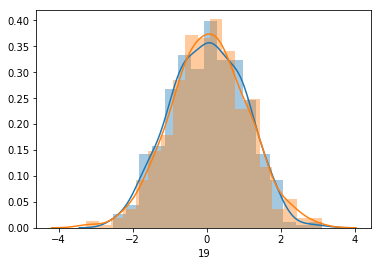

In [ ]:
#seperate values
j = 1
for i in list(learn0.columns.values):
#    print(i)
    if i != 'class':
        plt.figure(j)
        sb.distplot(learn0[i])
        sb.distplot(learn1[i])
        j = j+1

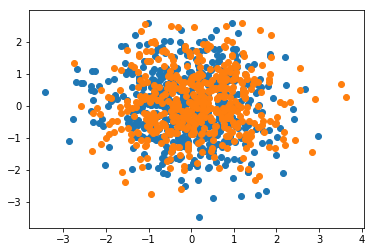

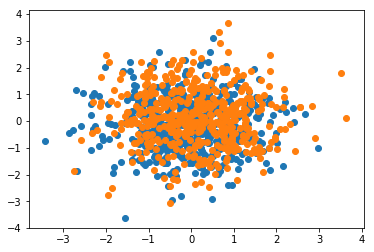

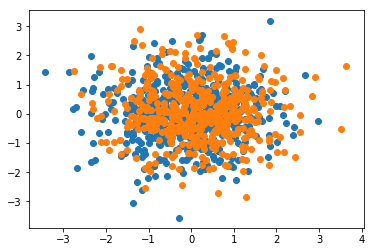

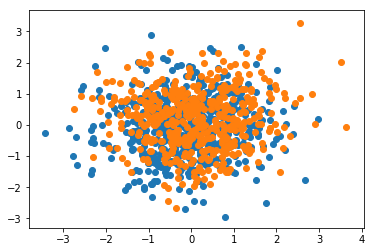

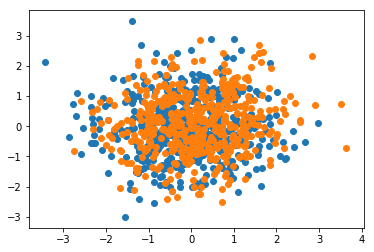

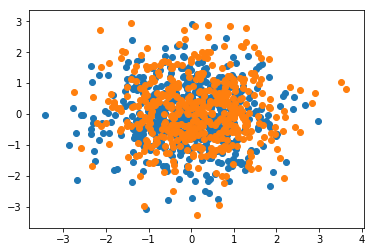

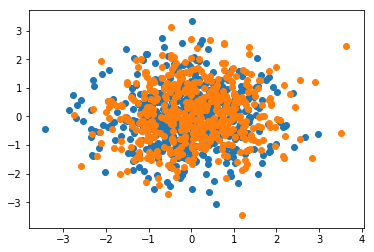

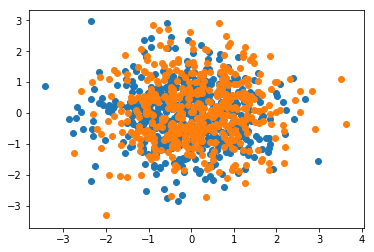

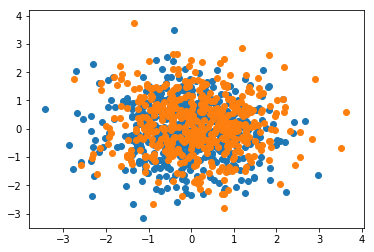

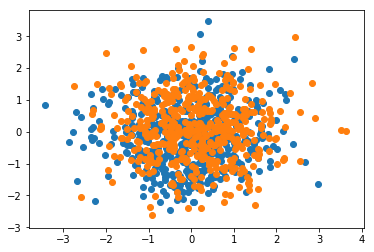

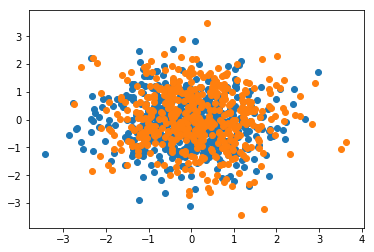

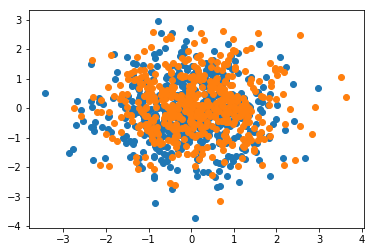

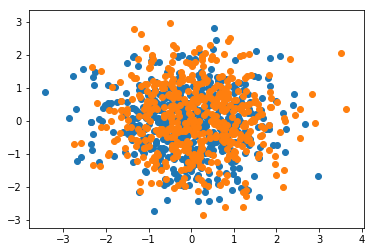

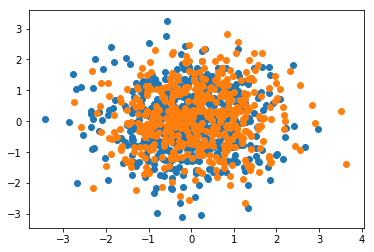

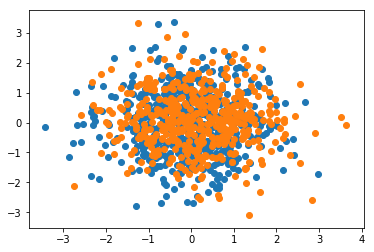

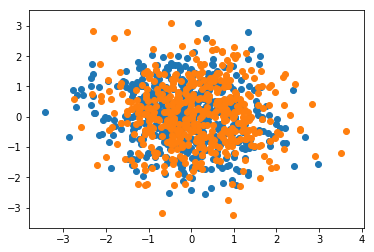

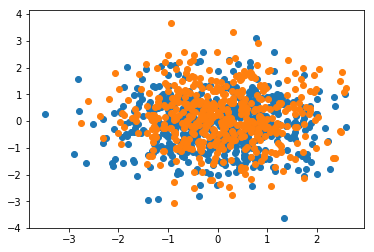

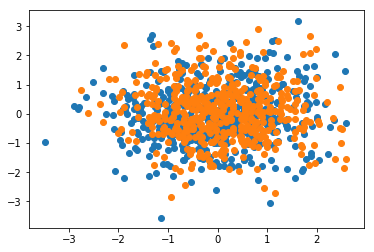

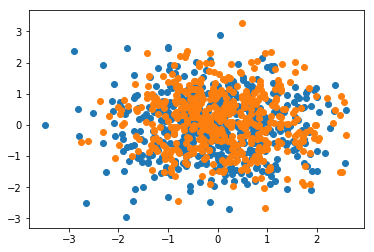

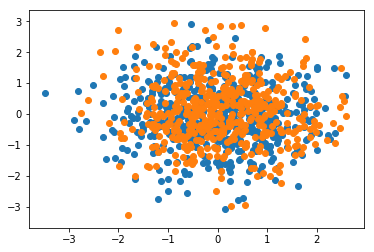

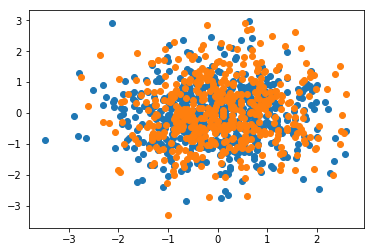

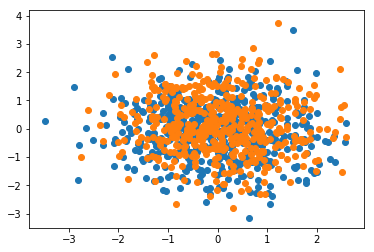

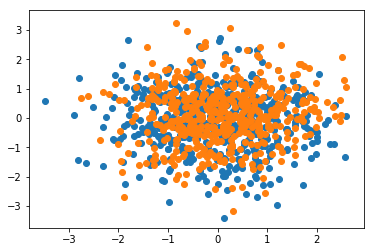

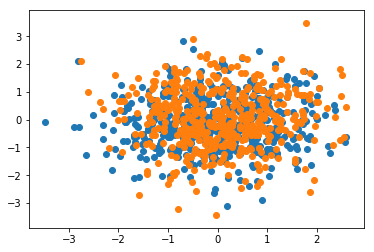

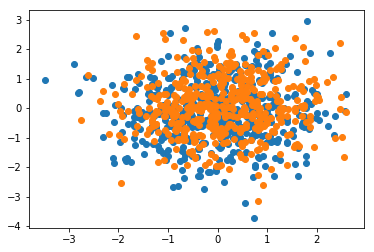

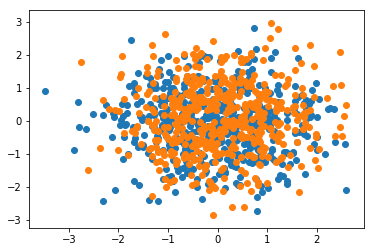

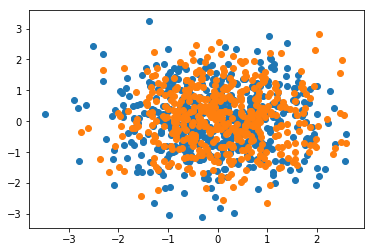

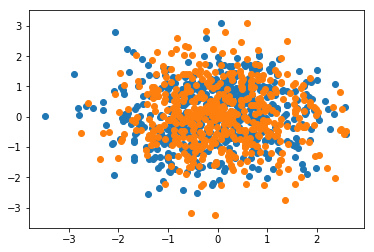

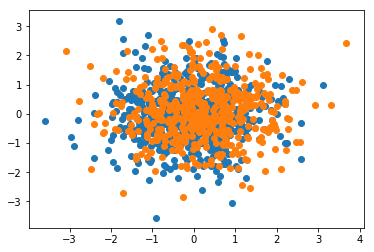

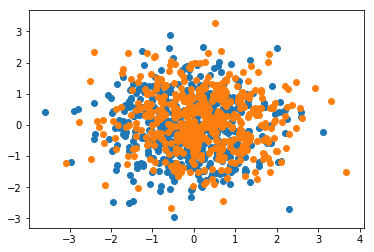

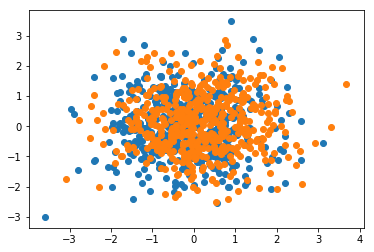

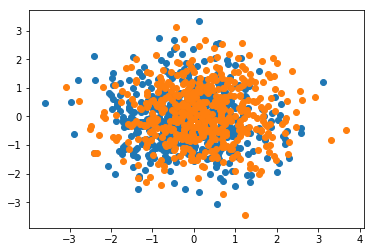

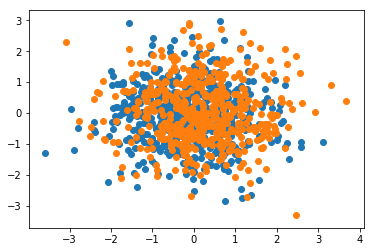

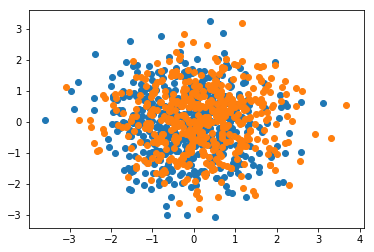

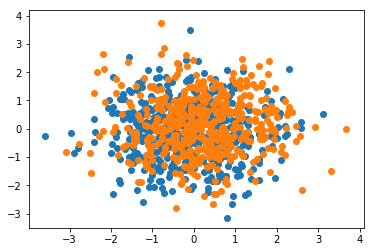

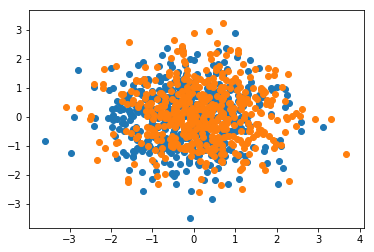

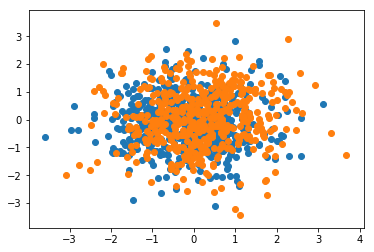

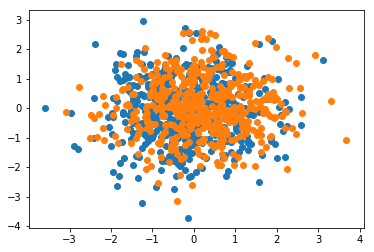

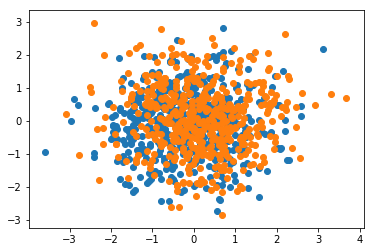

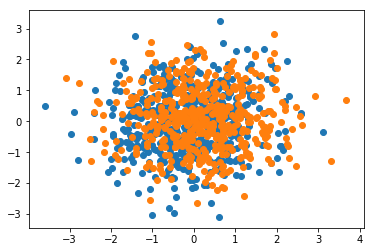

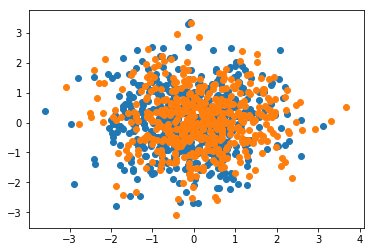

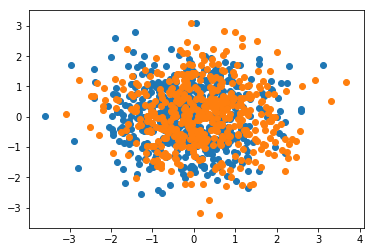

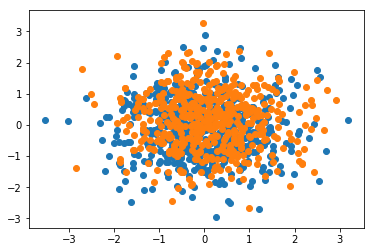

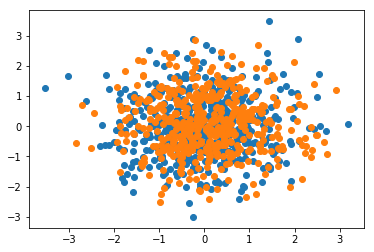

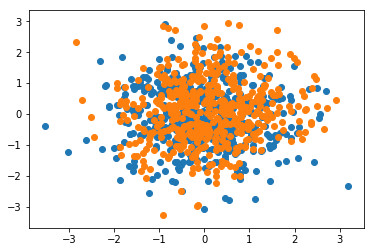

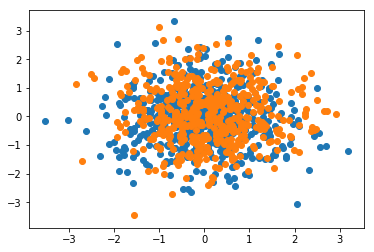

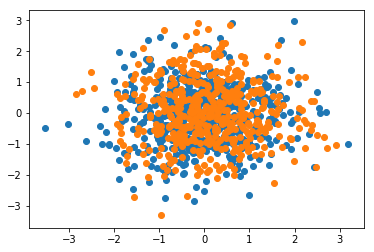

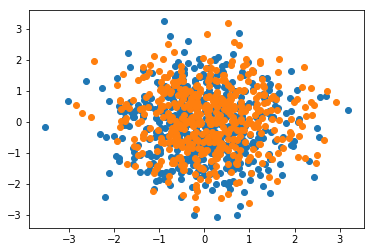

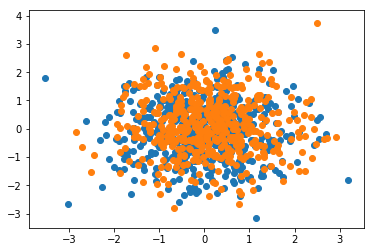

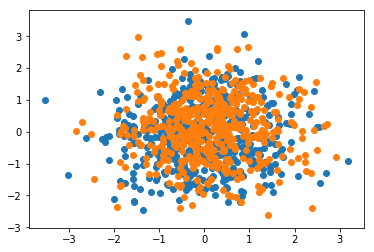

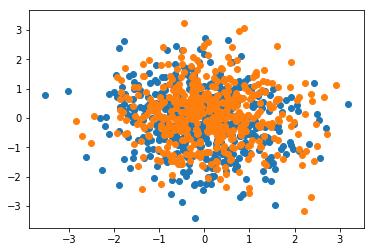

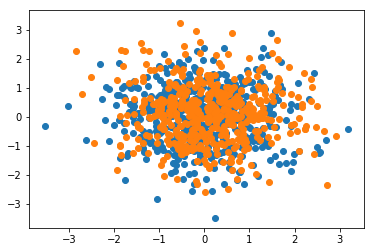

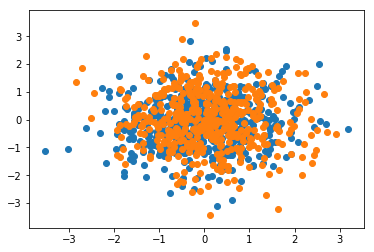

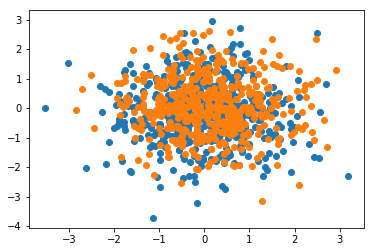

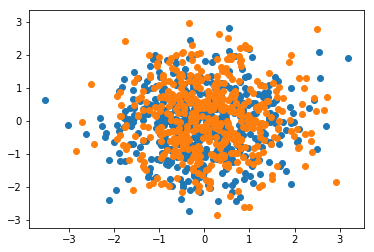

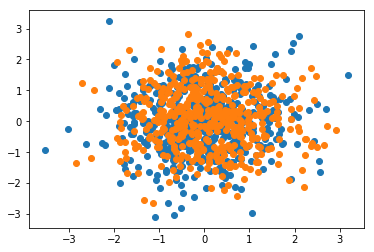

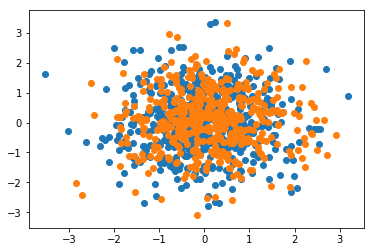

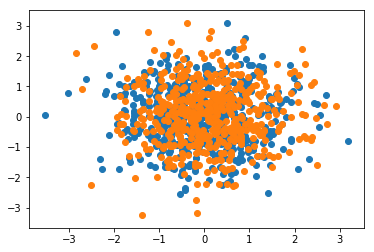

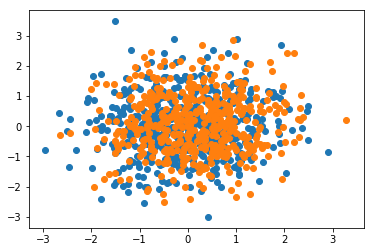

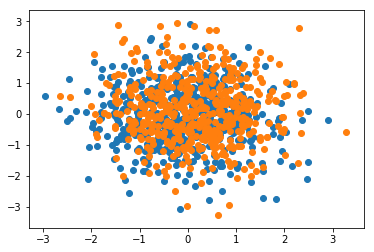

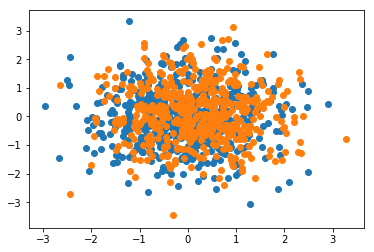

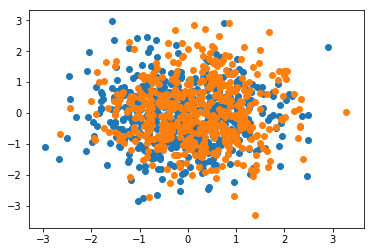

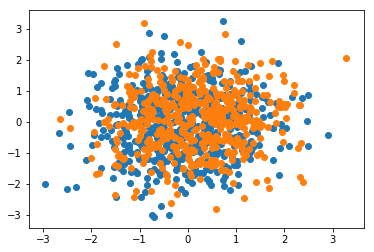

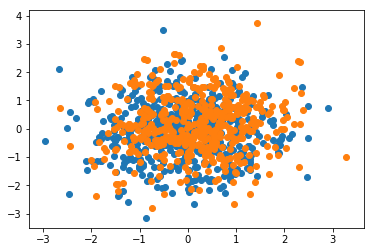

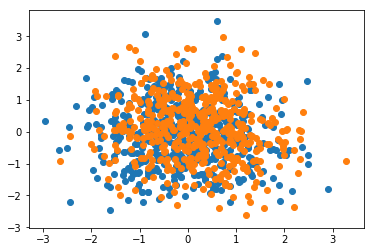

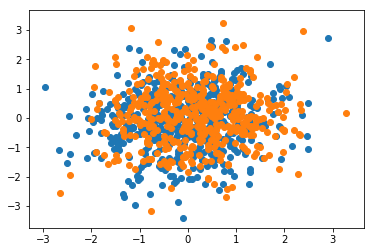

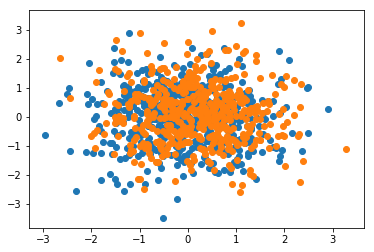

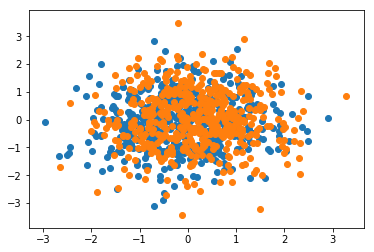

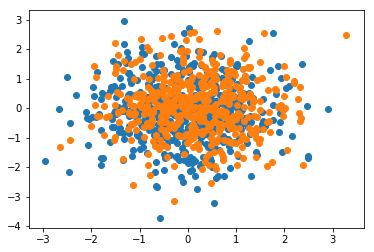

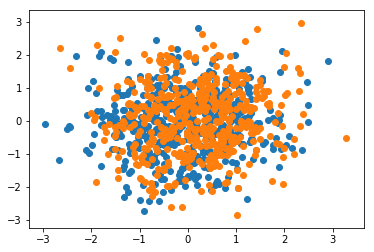

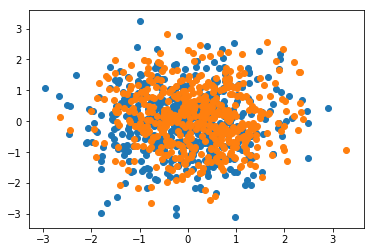

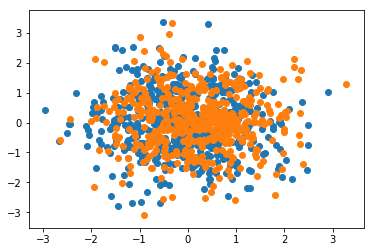

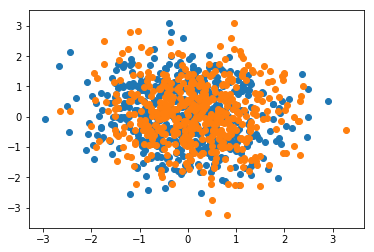

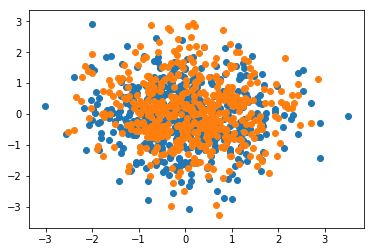

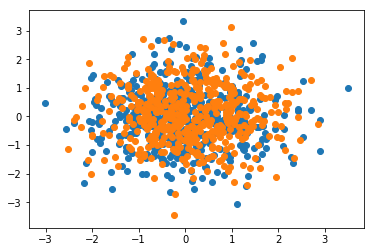

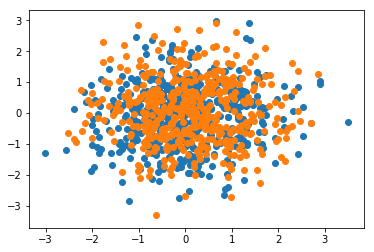

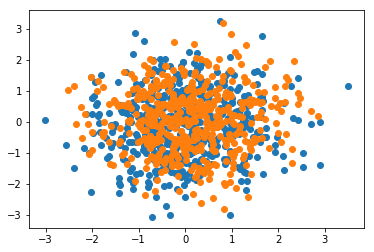

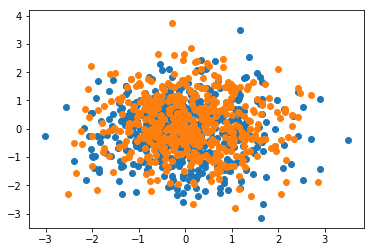

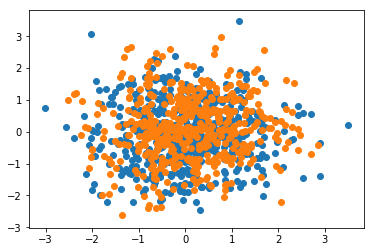

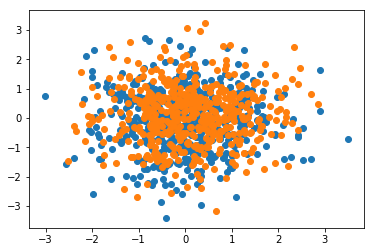

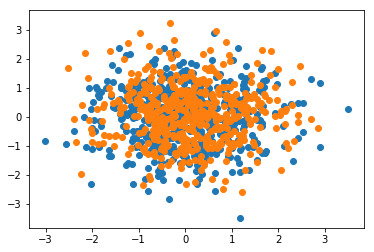

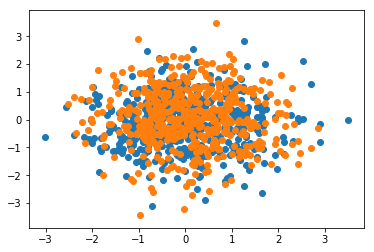

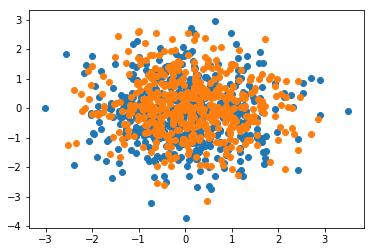

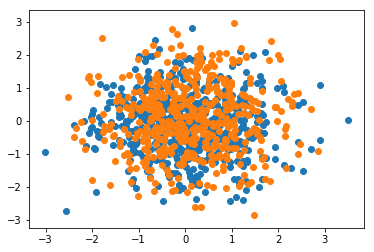

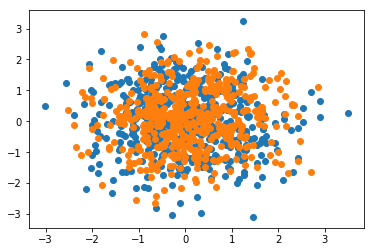

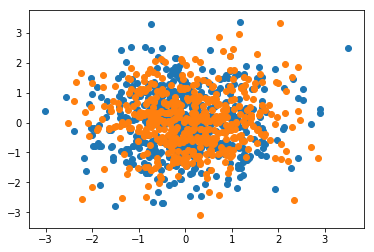

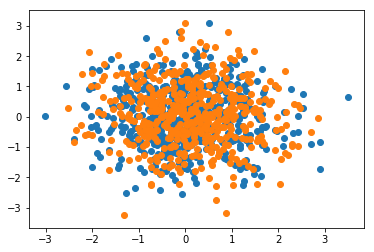

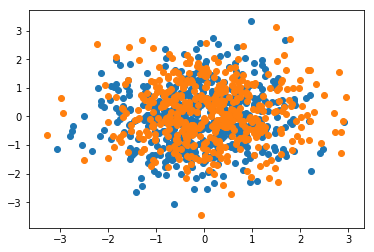

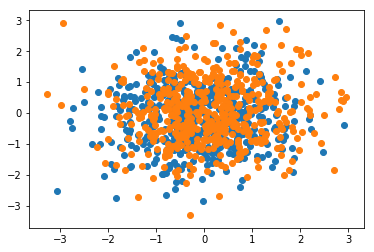

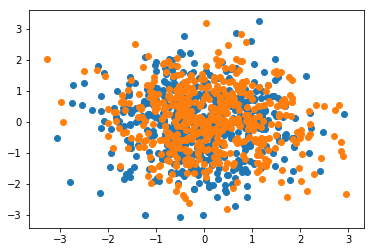

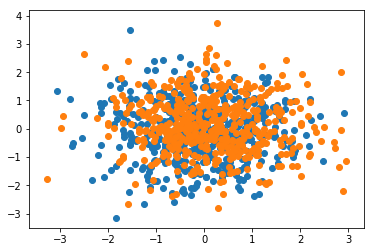

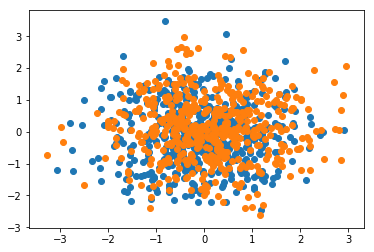

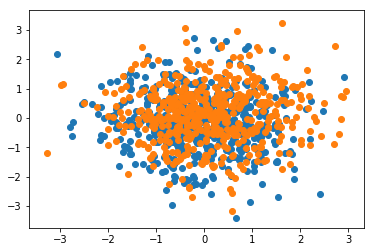

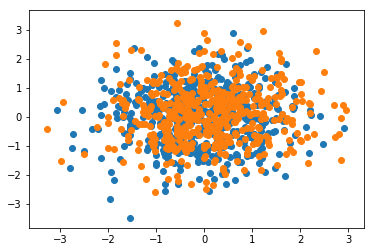

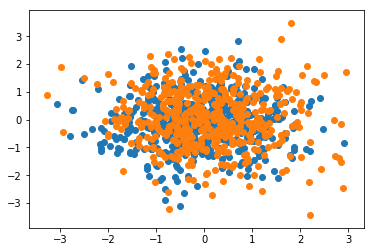

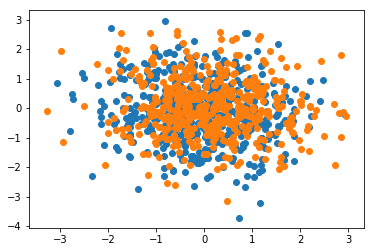

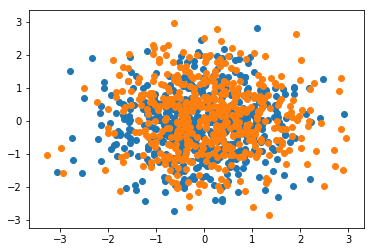

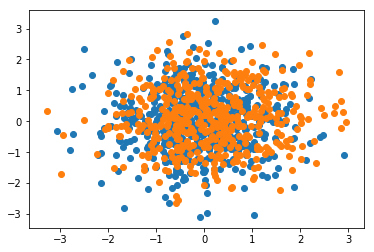

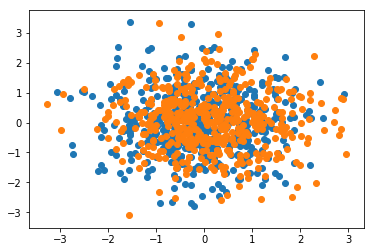

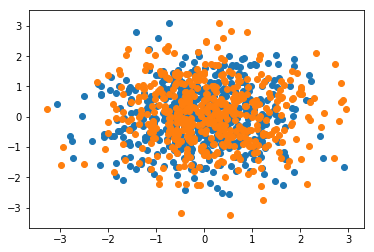

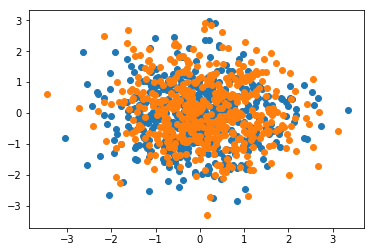

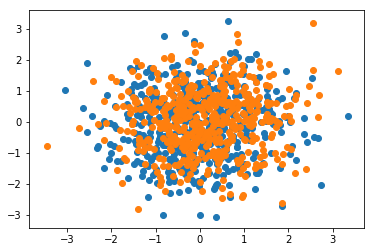

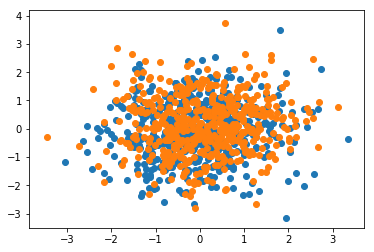

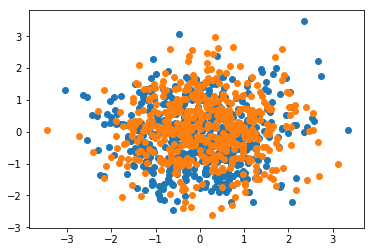

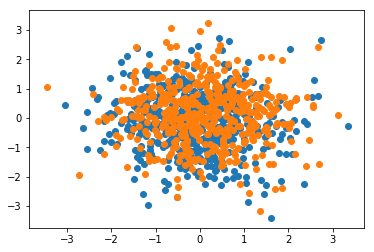

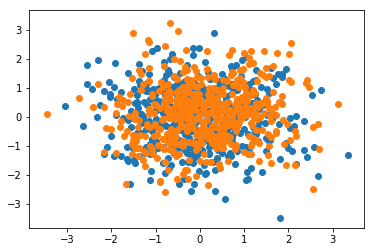

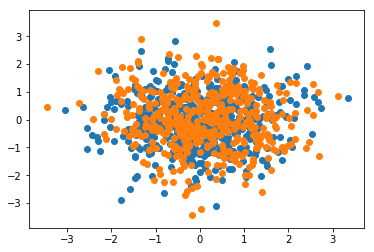

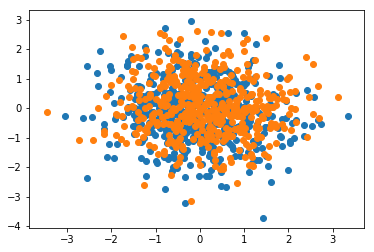

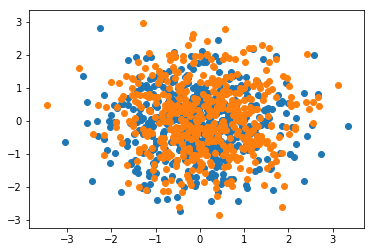

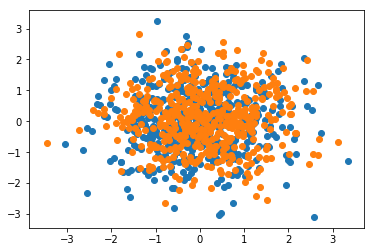

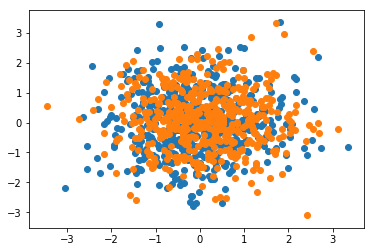

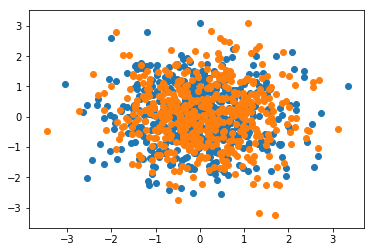

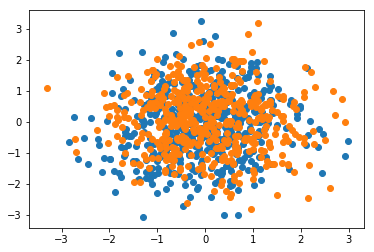

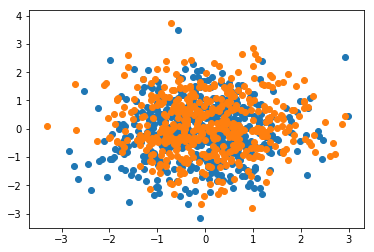

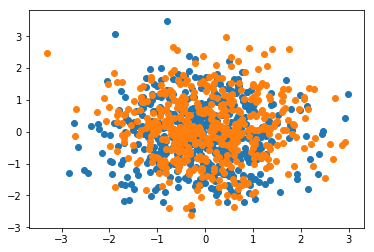

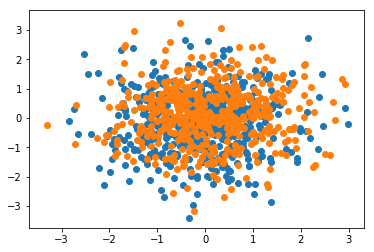

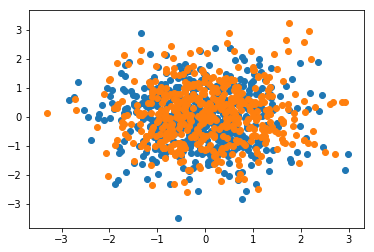

In [ ]:
k = 0
for i in list(learn0.columns.values):
    for j in list(learn0.columns.values):
        if i != 'class' and j != 'class' and int(j) > int(i):
            k = k+1
            plt.figure(k)
            plt.scatter(learn0[i], learn0[j])
            plt.scatter(learn1[i], learn1[j])
            plt.show()
    

In [ ]:
def plotCovariance(set1, set2, plot = True):
    #Calculate and Plot Covariance Matrices
   
    cov1 = np.cov(np.asarray(set1).T)
    #print(cov1.shape)
    if plot:
        plt.figure()
        plt.imshow(cov1)
        #print(np.cov(np.asarray(set1).T))
        plt.show()
        plt.figure()
    cov2 = np.cov(np.asarray(set2).T)
    if plot:
        plt.imshow(cov2)
        plt.show()
    return cov1[:-1,:-1], cov2[:-1,:-1]

cov0 , cov1 = plotCovariance(learn0, learn1, plot=False)
print(cov0.shape)

## Naive Bayes Attempt
Assume multivariate normal distribution for each data set.

In [ ]:
from sklearn import metrics
class naiveBayes:
    def __init__(self):
        self.cov0Inv = None
        self.cov1Inv = None
        self.sigmaNorm1 = None
        self.sigmaNorm2 = None
        self.mu0 = None
        self.mu1 = None
    
    def fit(self,dataSet):
        set0, set1 = seperateData(dataSet)
        cov0, cov1 = plotCovariance(set0, set1, plot = False)
        self.cov0Inv = np.linalg.inv(cov0)
        self.cov1Inv = np.linalg.inv(cov1)
        
        self.sigmaNorm0 = np.linalg.norm(cov0)
        self.sigmaNorm1 = np.linalg.norm(cov1)
        
        self.mu0 = np.asarray(set0.mean(axis=0))[:-1]
        self.mu1 = np.asarray(set1.mean(axis=0))[:-1]
        #print(self.mu0, self.mu1, self.sigmaNorm1, self.sigmaNorm0)
    
    def gauss(self, sigmaInv, sigmaNorm, mu,x):
        k = x.size
        #print(sigmaNorm.shape, mu.shape, x.shape)
        return 1/np.sqrt((2*np.pi)**k*sigmaNorm)*np.exp(-.5*np.matmul(np.matmul((x-mu).T,sigmaInv),(x-mu)))
    
    def predict(self, data):
        data = np.asarray(data)
        rows, columns =data.shape
        p = []
        for i in range(0,rows):
            p0 = self.gauss(self.cov0Inv, self.sigmaNorm0, self.mu0, data[i,:])
            p1=  self.gauss(self.cov1Inv, self.sigmaNorm1, self.mu1, data[i,:])
            if p0 > p1:
                p.append(0)
            else:
                p.append(1)
        return np.asarray(p)


    

pnb = naiveBayes()
pnb.fit(learn)
result = pnb.predict(xlearn)
print("Classification report for classifier %s:\n%s\n"
      % (pnb, metrics.classification_report(ylearn['class'], result)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(ylearn['class'], result))

## Support Vector Machine Attempt

In [86]:
from sklearn import svm, metrics
clf = svm.SVC()
clf.fit(xlearn, ylearn['class'])
predict = clf.predict(xlearn)
print(type(predict))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(ylearn['class'], predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(ylearn['class'], predict))

<class 'numpy.ndarray'>
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.81      0.86      0.84       518
        1.0       0.84      0.78      0.81       482

avg / total       0.83      0.82      0.82      1000


Confusion matrix:
[[447  71]
 [105 377]]


## Random Forrest Attempt

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)
random_forest_classifier.fit(xlearn, ylearn['class'])
predict = random_forest_classifier.predict(xlearn)
print("Classification report for classifier %s:\n%s\n"
      % (random_forest_classifier, metrics.classification_report(ylearn['class'], predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(ylearn['class'], predict))
(metrics.confusion_matrix(ylearn['class'], predict)[1,1]+ metrics.confusion_matrix(ylearn['class'], predict)[0,0])/ylearn['class'].size
#ylearn['class'].size

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True):
             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96       518
        1.0       0.96      0.96      0.96       482

avg / total       0.96      0.96      0.96      1000


Confusion matrix:
[[500  18]
 [ 20 462]]


/home/peter/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.962

## Functions for cycling through the data sets

In [50]:
def randomForestPrediction(number):
    xlearn, ylearn, xtest, param = inputData(number)
    random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=10, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=10,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)
    random_forest_classifier.fit(xlearn, ylearn['class'])
    predict = random_forest_classifier.predict(xlearn)
    cfmat = metrics.confusion_matrix(ylearn['class'], predict)
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(ylearn['class'], predict))
    auc = sklearn.metrics.roc_auc_score(predict, ylearn['class'])
    print("Auc Score: \n%s" % auc)
    return auc, (metrics.confusion_matrix(ylearn['class'], predict)[1,1]+ metrics.confusion_matrix(ylearn['class'], predict)[0,0])/ylearn['class'].size, random_forest_classifier.predict(xtest), cfmat


for i in range(1,5):
    print('Data Set:'+str(i))
    auc, accuracy, _, _ = randomForestPrediction(i)
    print('Accuracy = ', accuracy)

Data Set:1
Confusion matrix:
[[443  75]
 [ 69 413]]
Auc Score: 
0.855772925204918
Accuracy =  0.856
Data Set:2
Confusion matrix:
[[408 101]
 [104 387]]
Auc Score: 
0.794953893442623
Accuracy =  0.795
Data Set:3
Confusion matrix:
[[437  70]
 [ 90 403]]
Auc Score: 
0.8406152340224093
Accuracy =  0.84
Data Set:4
Confusion matrix:
[[464  57]
 [ 70 409]]
Auc Score: 
0.8732981305556896
Accuracy =  0.873


In [10]:
217212+1897+7039+73852

300000

In [ ]:
(217212+73852)/300000

0.9702133333333334

In [49]:
def SVMprediction(num):
    xlearn, ylearn, xtest, param = inputData(num)
    classifier = svm.SVC()
    classifier.fit(xlearn, ylearn['class'])
    predict = classifier.predict(xlearn)
    cfmat = metrics.confusion_matrix(ylearn['class'], predict)
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(ylearn['class'], predict))
    auc = sklearn.metrics.roc_auc_score(predict, ylearn['class'])
    print("Auc Score: \n%s" % auc)
    return auc, (metrics.confusion_matrix(ylearn['class'], predict)[1,1]+ metrics.confusion_matrix(ylearn['class'], predict)[0,0])/ylearn['class'].size, classifier.predict(xtest), cfmat


for i in range(1,5):
    auc, accuracy, _, _ = SVMprediction(i)
    print('Accuracy = ', accuracy)

Confusion matrix:
[[447  71]
 [105 377]]
Auc Score: 
0.8256502329192545
Accuracy =  0.824
Confusion matrix:
[[425  84]
 [104 387]]
Auc Score: 
0.8125293487291249
Accuracy =  0.812
Confusion matrix:
[[507   0]
 [  0 493]]
Auc Score: 
1.0
Accuracy =  1.0
Confusion matrix:
[[521   0]
 [  0 479]]
Auc Score: 
1.0
Accuracy =  1.0


In [94]:
def NBprediction(num):
    xlearn, ylearn, xtest, param = inputData(num)
    classifier = naiveBayes()
    classifier.fit(pd.concat([xlearn, ylearn], axis = 1))
    predict = classifier.predict(xlearn)
    cfmat = metrics.confusion_matrix(ylearn['class'], predict)
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(ylearn['class'], predict))
    auc = sklearn.metrics.roc_auc_score(predict, ylearn['class'])
    print("Auc Score: \n%s" % auc)
    return auc, (metrics.confusion_matrix(ylearn['class'], predict)[1,1]+ metrics.confusion_matrix(ylearn['class'], predict)[0,0])/ylearn['class'].size, classifier.predict(xtest), cfmat

for i in range(1,15):
    auc, accuracy, _, _ = NBprediction(i)
    print('Accuracy = ', accuracy)

Confusion matrix:
[[374 144]
 [116 366]]
Auc Score: 
0.7404561824729893
Accuracy =  0.74
Confusion matrix:
[[357 152]
 [184 307]]
Auc Score: 
0.664367205087005
Accuracy =  0.664
Confusion matrix:
[[377 130]
 [154 339]]
Auc Score: 
0.7163978332710941
Accuracy =  0.716
Confusion matrix:
[[521   0]
 [  0 479]]
Auc Score: 
1.0
Accuracy =  1.0
Confusion matrix:
[[821   4]
 [ 59 116]]
Auc Score: 
0.9498106060606062
Accuracy =  0.937


OverflowError: (34, 'Numerical result out of range')

In [16]:
def multilayerPerceptron(X, weights, bases):
    layer1 = tf.nn.relu(tf.add(tf.matml(X, weights['h1']), biases['b1']))
    layer2 = tf.nn.relu(tf.add(tf.matml(layer1, weights['h2']), biases['b2']))
    layer3 = tf.nn.relu(tf.add(tf.matml(layer2, weights['h3']), biases['b3']))
    return tf.matmu(layer_2, weights['out'])biases['out']
    
def nnPredict(num):
    xlearn, ylearn, xtest, param = inputData(num)
    learningRate = 0.001
    trainingEpochs = 200
    batchsize = ylearn.shape
    sess = tf.Session()
    my_feature_columns = []
    for key in list(learn0.columns.values):
        my_feature_columns.append(tf.feature_column.numeric_column(key=key))
    #print(my_feature_columns)
    classifier = tf.estimator.DNNClassifier(
        feature_columns=my_feature_columns,
        # Threee hidden layers of 10 nodes each.
        hidden_units=[10, 10, 10],
        # The model must choose between 2 classes.
        n_classes=2)
    #print(xlearn.as_matrix())
    #print(xlearn.shape)
    dataset = tf.data.Dataset.from_tensor_slices((xlearn, ylearn))
    iterator = dataset.make_one_shot_iterator()
    nextElement = iterator.get_next()
    value = sess.run(nextElement)
    print(value)
    classifier.train(input_fn = nextElement, steps = 1000)
    classifier.train(input_fn = dataIn, steps = 1000)
    classifier.evaluate(input_fn = dataset)

nnPredict(1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmphwhflxxc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb9c7fcf2b0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
(array([-0.14512501,  0.2224808 ,  2.29110336,  1.20604722, -2.68106275,
        0.44917834,  0.17268994, -1.47039834, -1.48782321, -0.35316809,
        2.0963022 , -0.58683147, -1.09199585,  0.49722746, -1.3178045 ,
       -0.03259244, -1.17587416,  0.80682197, -0.62163198,  1.68567511]), array([0.]))


TypeError: unsupported callable

In [22]:
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label = 2)
print(fpr)
print(tpr)
print(thresholds)

[0.  0.5 0.5 1. ]
[0.5 0.5 1.  1. ]
[0.8  0.4  0.35 0.1 ]


In [ ]:
penalty1 = np.array([[-10,10],[1, 0]])
penalty2 = np.array([[-1,2],[1, -1]])
results =[]
for i in range(1,15):
    results =[]
    auc_SVM, accuracy_SVM, predict_SVM, cfm_SVM = SVMprediction(i)
    auc_RF, accuracy_RF, predict_RF, cfm_RF = randomForestPrediction(i)
    test = [0, 0, 0, 0]
    if auc_SVM > auc_RF:
        results.append(predict_SVM)
    else:
        results.append(predict_RF)    
    if accuracy_SVM > accuracy_RF:
        results.append(predict_SVM)
    else:
        results.append(predict_RF)    
    if np.sum(penalty1*cfm_SVM) < np.sum(penalty1*cfm_RF):
        results.append(predict_SVM)
    else:
        results.append(predict_RF)
    if np.sum(penalty2*cfm_SVM) < np.sum(penalty2*cfm_RF):
        results.append(predict_SVM)
    else:
        results.append(predict_RF)
    np.savetxt("task1_"+str(i)+"_ans.csv", np.asarray(results).T, delimiter = ',')

Confusion matrix:
[[447  71]
 [105 377]]
Auc Score: 
0.8256502329192545
Confusion matrix:
[[463  55]
 [ 74 408]]
Auc Score: 
0.8717034480816953
Confusion matrix:
[[425  84]
 [104 387]]
Auc Score: 
0.8125293487291249
Confusion matrix:
[[430  79]
 [ 90 401]]
Auc Score: 
0.8311698717948718
Confusion matrix:
[[507   0]
 [  0 493]]
Auc Score: 
1.0
Confusion matrix:
[[433  74]
 [ 85 408]]
Auc Score: 
0.8411901824764896
Confusion matrix:
[[521   0]
 [  0 479]]
Auc Score: 
1.0
Confusion matrix:
[[451  70]
 [ 65 414]]
Auc Score: 
0.8647014542891921
Confusion matrix:
[[825   0]
 [  0 175]]
Auc Score: 
1.0
Confusion matrix:
[[821   4]
 [142  33]]
Auc Score: 
0.8722180124049282
Confusion matrix:
[[593   0]
 [  0 407]]
Auc Score: 
1.0
Confusion matrix:
[[553  40]
 [134 273]]
Auc Score: 
0.8385767633504007
Confusion matrix:
[[859   0]
 [ 91  50]]
Auc Score: 
0.9521052631578947
Confusion matrix:
[[857   2]
 [ 99  42]]
Auc Score: 
0.925494484594903
Confusion matrix:
[[799   0]
 [  0 201]]
Auc Score: 
